# Network Comparison

## Install statements

In [ ]:
# Install statements

# install.packages(c("remotes","pROC","naivebayes"))
# remotes::install_github("jtextor/bayesianNetworks")
# install.packages("bnlearn")
# install.packages("dagitty")
# install.packages("lavaan")

In [ ]:
# install.packages("BiocManager")
# BiocManager::install("Rgraphviz")

In [1]:
# Packages

library( bayesianNetworks )
library( naivebayes )
library( bnlearn )
library( dagitty )
library( lavaan )

Warning message:
"package 'naivebayes' was built under R version 3.6.3"naivebayes 0.9.7 loaded
Warning message:
"package 'bnlearn' was built under R version 3.6.3"Warning message:
"package 'dagitty' was built under R version 3.6.3"
Attaching package: 'dagitty'

The following objects are masked from 'package:bnlearn':

    ancestors, children, descendants, parents, spouses

Warning message:
"package 'lavaan' was built under R version 3.6.3"This is lavaan 0.6-7
lavaan is BETA software! Please report any bugs.


## The networks

[1] "Tabu Network Graph"


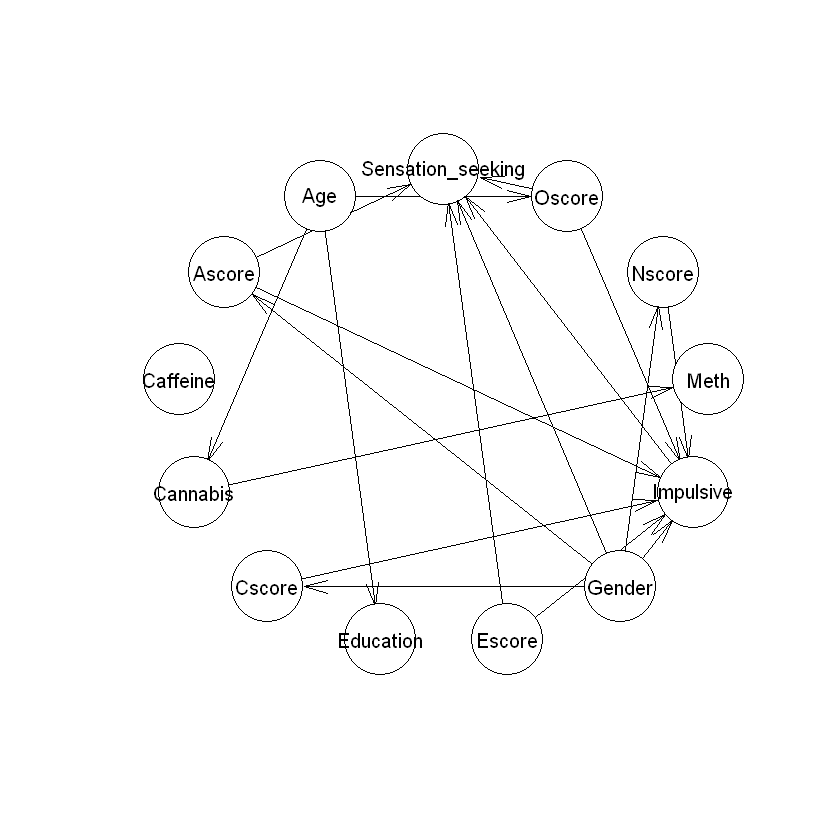

[1] "PC Stable Network Graph"



  Random/Generated Bayesian network

  model:
   [Age][Caffeine][Escore][Gender][Meth][Oscore][Ascore|Gender][Cscore|Gender]
   [Education|Age][Nscore|Gender][Cannabis|Age:Education]
   [Impulsive|Ascore:Cscore]
   [Sensation_seeking|Ascore:Escore:Gender:Impulsive:Oscore]
  nodes:                                 13 
  arcs:                                  13 
    undirected arcs:                     0 
    directed arcs:                       13 
  average markov blanket size:           3.38 
  average neighbourhood size:            2.00 
  average branching factor:              1.00 

  generation algorithm:                  Empty 


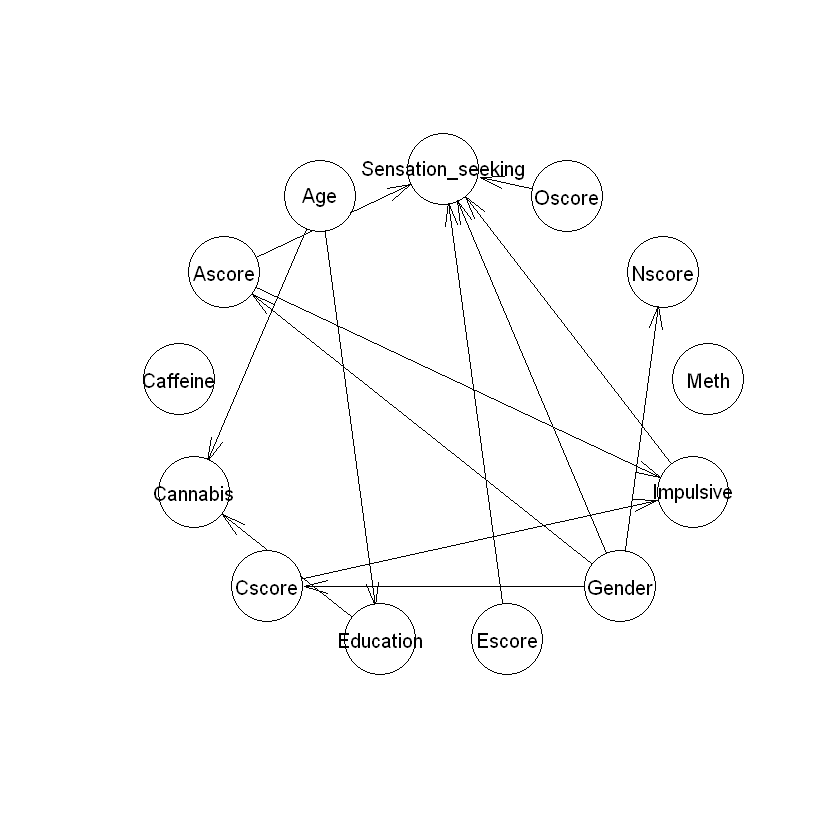

In [15]:
# Tabu

tabu_network = model2network("[Age][Gender][Escore][Caffeine][Education|Age][Nscore|Gender][Oscore|Age][Ascore|Gender][Cscore|Gender][Cannabis|Age][Impulsive|Gender:Nscore:Escore:Oscore:Ascore:Cscore][Meth|Cannabis][Sensation_seeking|Gender:Escore:Oscore:Ascore:Impulsive]")

# PC Stable
pcstable_network = model2network("[Age][Gender][Escore][Oscore][Caffeine][Meth][Education|Age][Nscore|Gender][Ascore|Gender][Cscore|Gender][Impulsive|Ascore:Cscore][Cannabis|Age:Education][Sensation_seeking|Gender:Escore:Oscore:Ascore:Impulsive]")

plot(tabu_network)
print("Tabu Network Graph")

plot(pcstable_network)
print("PC Stable Network Graph")

## Comparison

Loading required namespace: Rgraphviz


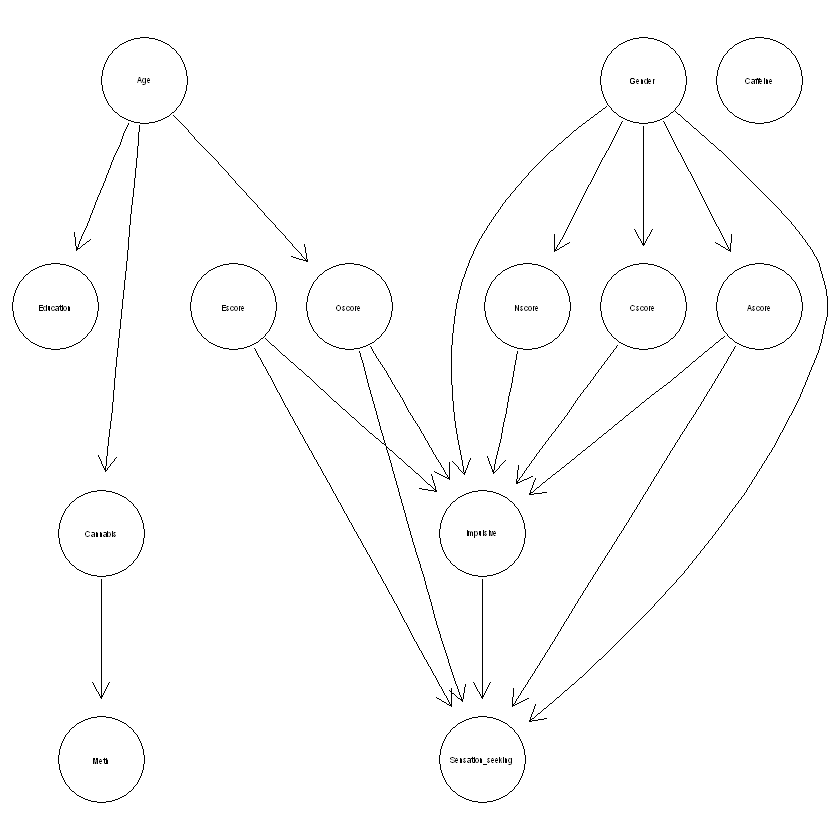

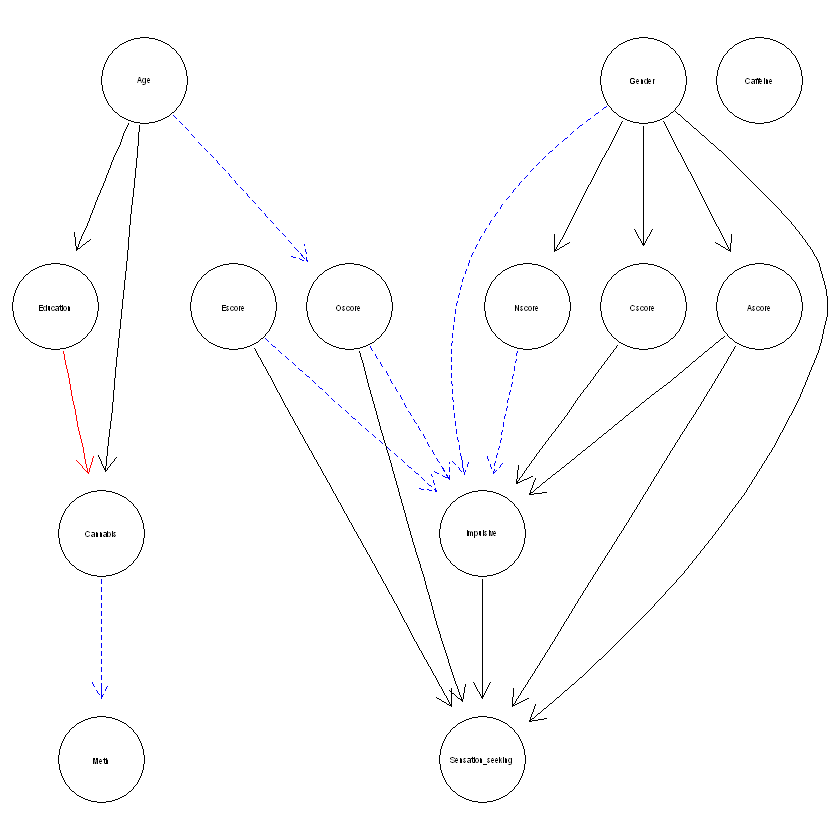

In [13]:
graphviz.compare(tabu_network, pcstable_network)

In [14]:
hamming(tabu_network, pcstable_network)

[1] 7

The compared network structures compared on BIC level with eachother:

| Network   | BIC          |
|-----------|--------------|
| PC Stable | 10           |
| Tabu      | -50711,03519 |

## Comparison with assignment 1

In [27]:
assignment_1_dag <- dagitty('dag {
bb="0,0,1,1"
Age [pos="0.070,0.753"]
Ascore [pos="0.270,0.753"]
Caffeine [pos="0.839,0.112"]
Cannabis [pos="0.846,0.427"]
Cscore [pos="0.270,0.260"]
Education [pos="0.650,0.426"]
Escore [pos="0.270,0.508"]
Gender [pos="0.074,0.260"]
Impulsive [pos="0.474,0.958"]
Meth [pos="0.846,0.834"]
Nscore [pos="0.264,0.900"]
Oscore [pos="0.270,0.088"]
Sensation_seeking [pos="0.447,0.072"]
Age -> Ascore [pos="0.188,0.797"]
Age -> Caffeine [pos="0.010,0.025"]
Age -> Cannabis [pos="0.311,0.741"]
Age -> Cscore [pos="0.039,0.480"]
Age -> Education [pos="0.458,0.713"]
Age -> Escore
Age -> Impulsive [pos="0.196,0.999"]
Age -> Meth [pos="0.302,0.847"]
Age -> Nscore
Age -> Oscore [pos="0.036,0.406"]
Age -> Sensation_seeking [pos="0.024,0.257"]
Ascore -> Cannabis
Ascore -> Meth [pos="0.350,0.851"]
Cannabis -> Meth
Cscore -> Education
Cscore -> Impulsive [pos="0.420,0.769"]
Cscore -> Meth [pos="0.577,0.720"]
Education -> Caffeine
Education -> Cannabis
Education -> Meth
Escore -> Caffeine [pos="0.393,0.237"]
Escore -> Cannabis [pos="0.416,0.556"]
Escore -> Impulsive [pos="0.404,0.691"]
Escore -> Meth [pos="0.158,0.875"]
Gender -> Ascore [pos="0.077,0.567"]
Gender -> Cscore
Gender -> Escore [pos="0.199,0.421"]
Gender -> Nscore [pos="0.077,0.534"]
Gender -> Oscore [pos="0.137,0.151"]
Impulsive -> Cannabis
Impulsive -> Meth [pos="0.603,0.879"]
Impulsive -> Sensation_seeking [pos="0.609,0.085"]
Nscore -> Cannabis
Nscore -> Impulsive
Nscore -> Meth
Oscore -> Cannabis
Oscore -> Education [pos="0.364,0.319"]
Oscore -> Impulsive [pos="0.305,0.395"]
Oscore -> Meth [pos="0.480,0.679"]
Oscore -> Sensation_seeking
Sensation_seeking -> Cannabis
Sensation_seeking -> Meth [pos="0.329,0.574"]
}
')

In [28]:
human_network <- toString(assignment_1_dag,"bnlearn")
human_network <- model2network(human_network)

In [29]:
hamming(human_network, pcstable_network)
hamming(human_network,tabu_network)

[1] 37

[1] 34

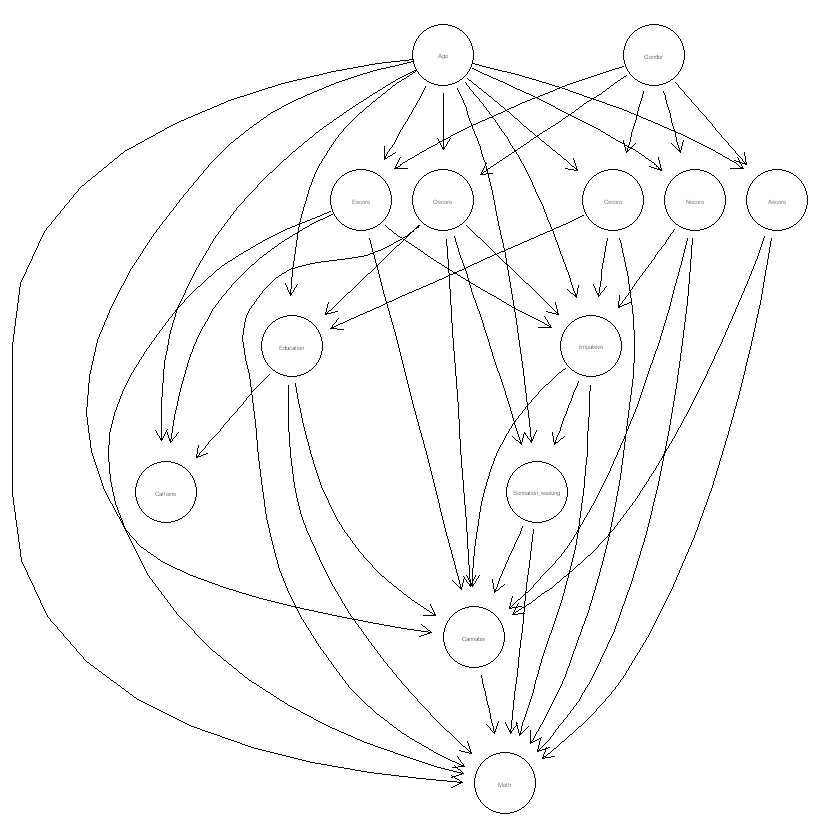

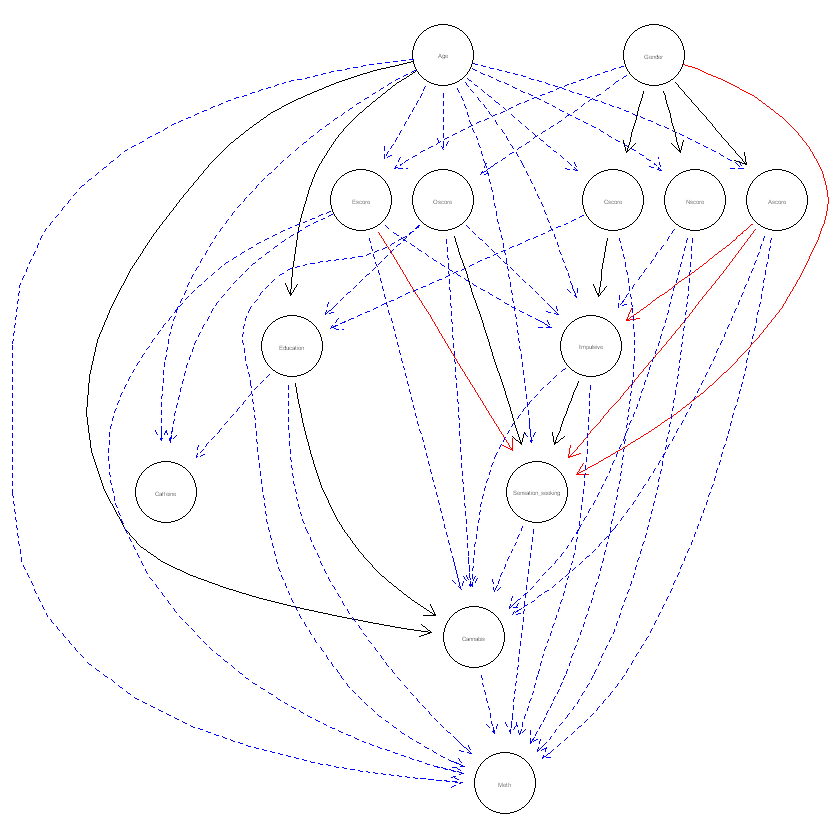

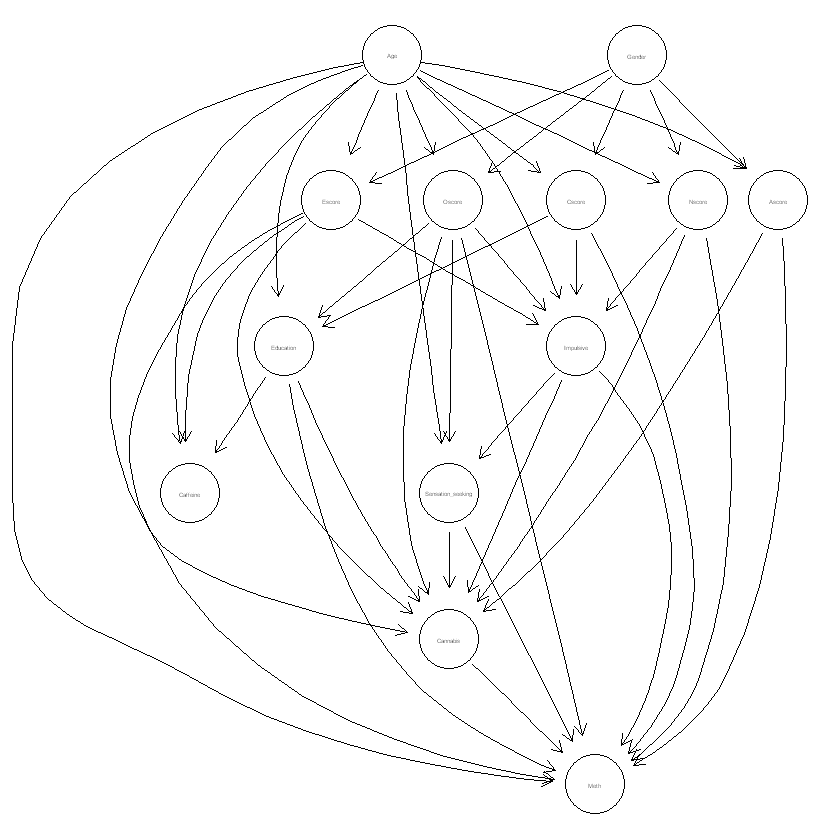

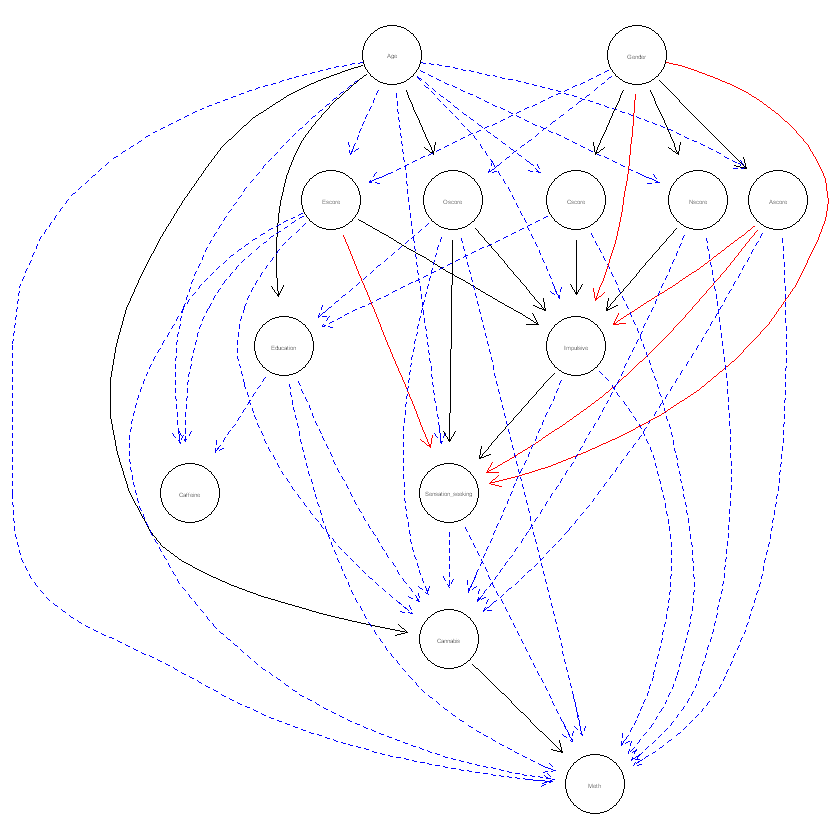

In [30]:
graphviz.compare(human_network, pcstable_network)
graphviz.compare(human_network, tabu_network)